# Descriptive data <a class="anchor" id="top"></a>


## TOC:
* [Data map](#bullet1)
    - [Method explanation](#sub-bullet1.1)
    - [Data map](#sub-bullet1.2)
        - [Twitter](#sub-bullet1.2.1)
        - [Reddit](#sub-bullet1.2.2)
* [Merging results](#bullet2)
* [Total social media observations](#bullet3)
    - [Tweets](#sub-bullet3.1)
    - [Reddit comments](#sub-bullet3.2)
* [ToDo](#ToDo)


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import os
import time
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# import statsmodels.formula.api as sm


## Results data map <a class="anchor" id="bullet1"></a>

**Method explanation** <a class="anchor" id="sub-bullet1.1"></a>

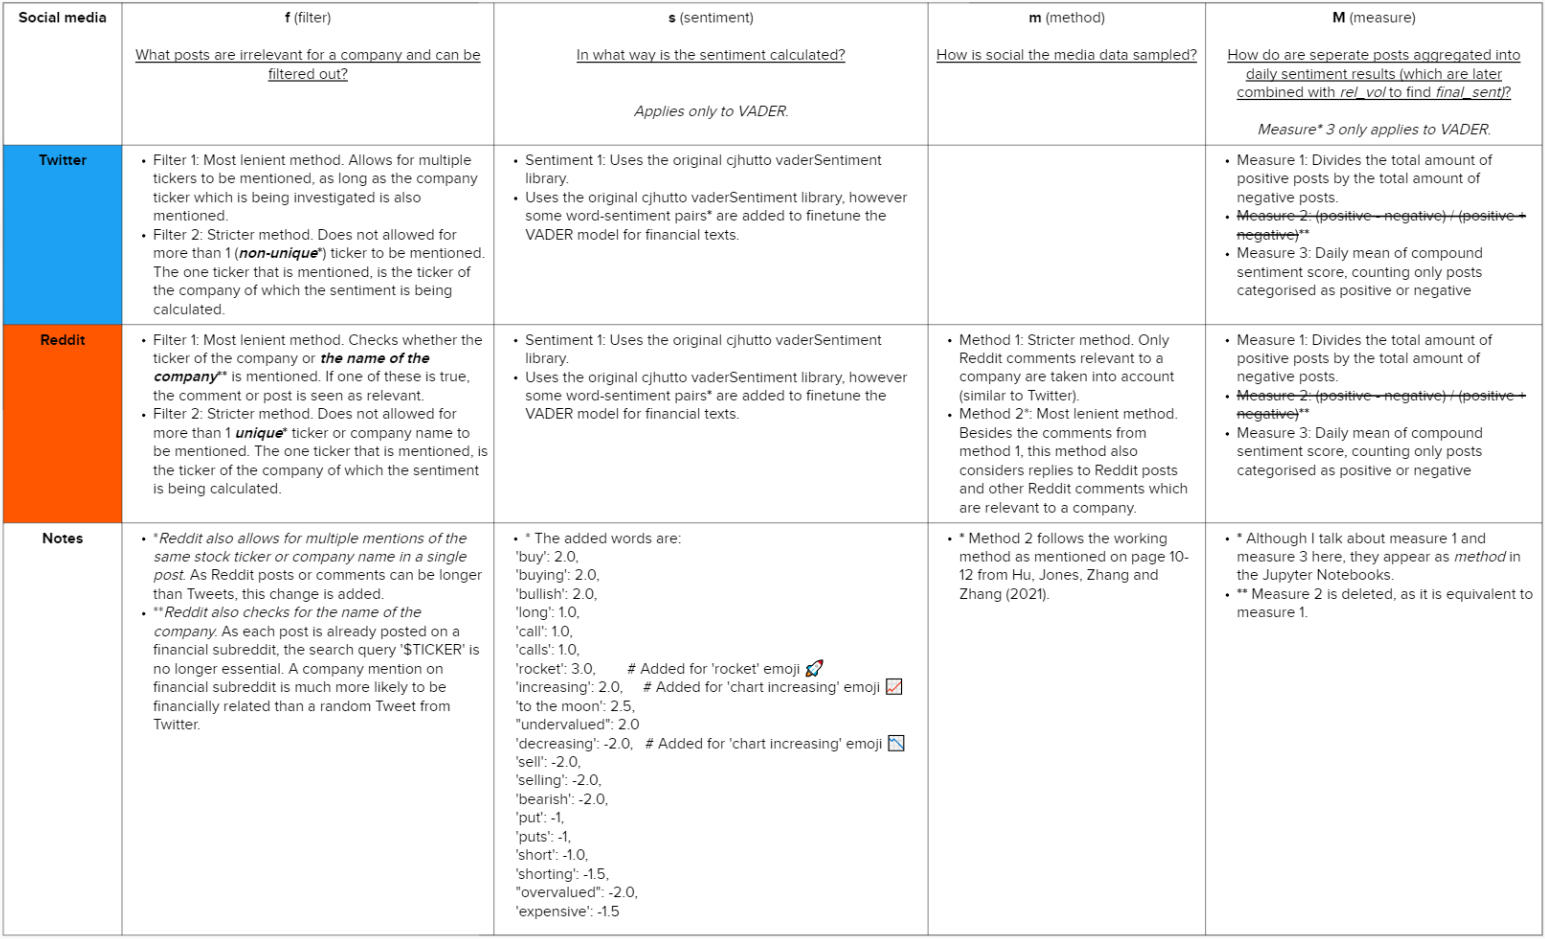

**Data map** <a class="anchor" id="sub-bullet1.2"></a>

Please see the table below for overview of all result fields generated with this research.

*Twitter* <a class="anchor" id="sub-bullet1.2.1"></a>

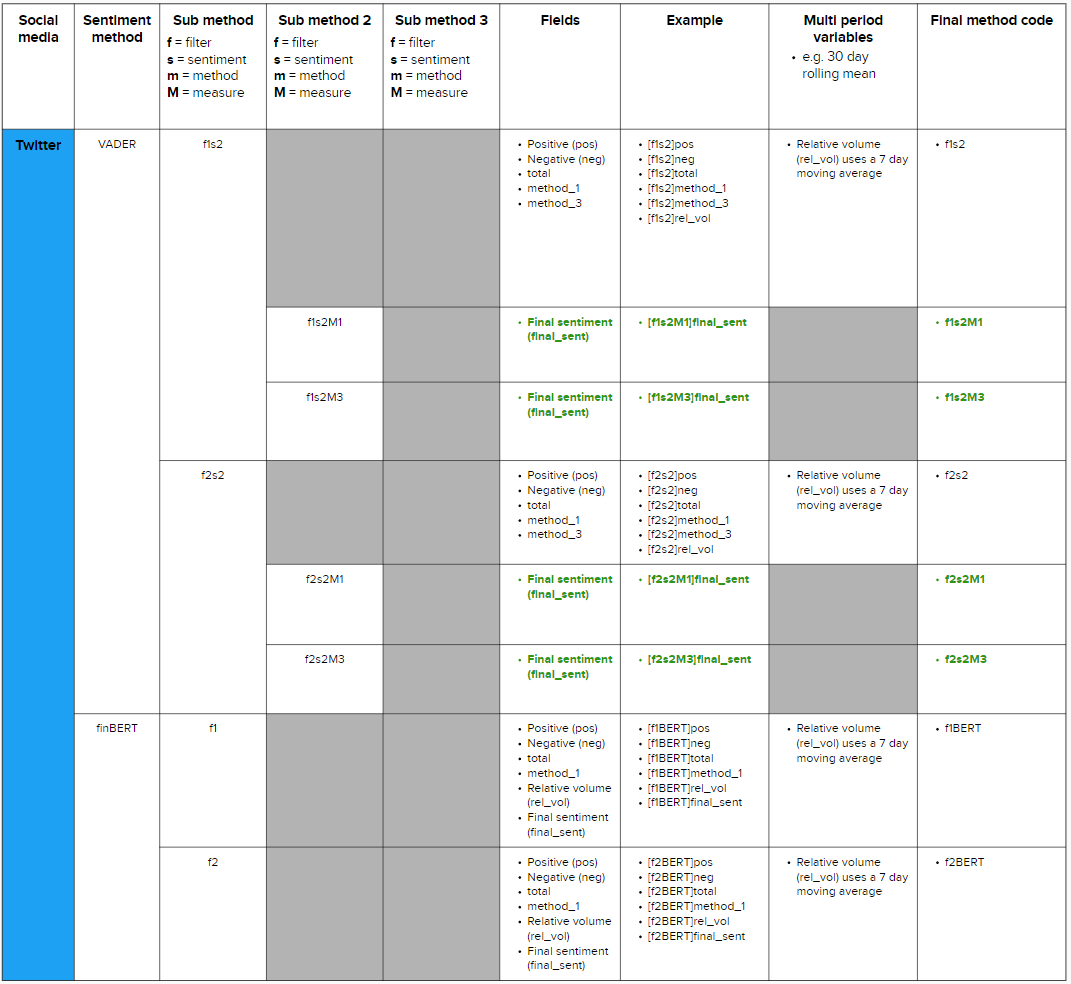

*Reddit* <a class="anchor" id="sub-bullet1.2.2"></a>

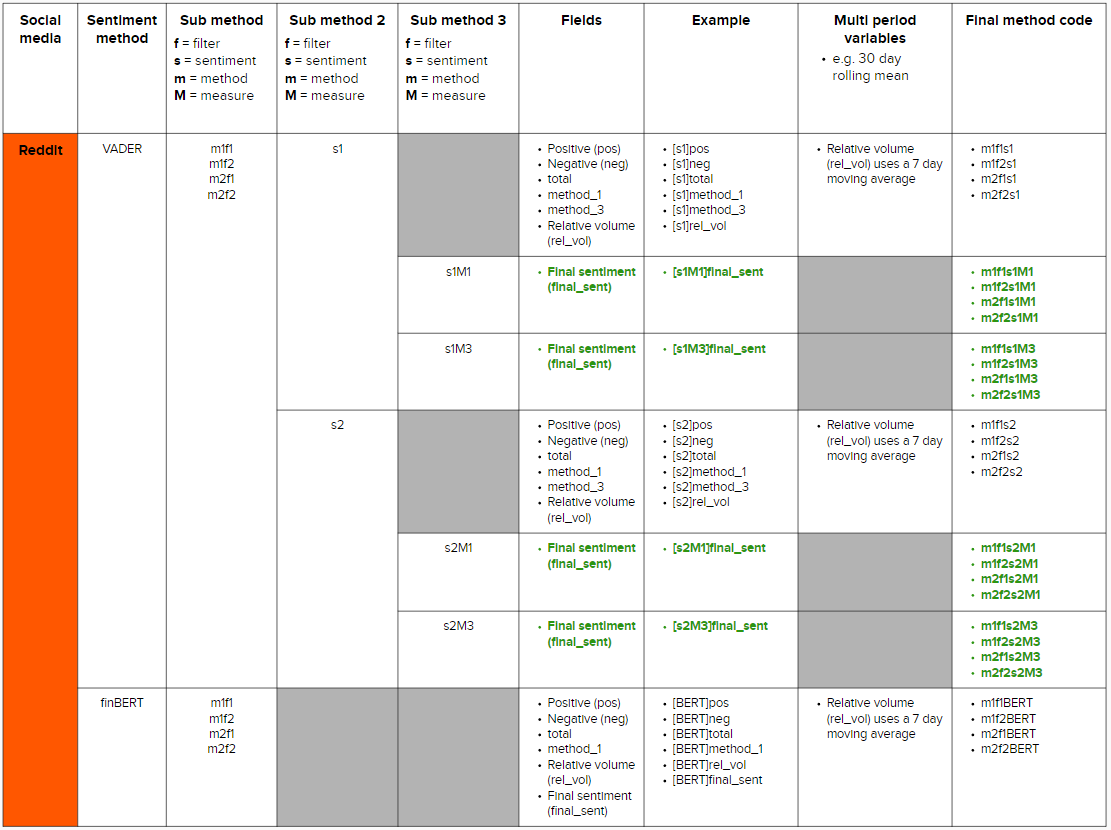

## Merging results <a class="anchor" id="bullet2"></a>

Based on the [data map](#bullet1) above, I merge all results into a single file per company.

Besides this, I label the data based on their original data source:
- Robintrack = [rh]...
- TAQ = [taq]...
- Twitter = [twit]...
- Reddit = [red]...

In [46]:
ticker = "AMD"

**Step 1 - Add Robintrack and TAQ info to results dataframe**

In [71]:
def add_robintrack_taq(results_df, ticker):
    # Path
    file_dir = r"E:\Users\Christiaan\Large_Files\Thesis\robintrack_taq"
    path_twitter_vader = os.path.join(file_dir, f"{ticker}.csv").replace('\\', '/')

    # Read csv
    df_robintrack_taq = pd.read_csv(path_robintrack_taq)

    # Rename Robinhood columns to contain [rh]
    df_robintrack_taq.columns = [str(col) if '[taq]' in str(col) or 'date' in str(col) else '[rh]' + str(col) for col in df_robintrack_taq.columns]

    # Create results_df
    results_df = df_robintrack_taq.copy()
    
    return results_df

**Step 2.1 - Add Twitter VADER**

In [76]:
def add_twitter_vader(results_df, ticker):
    # Path
    file_dir = r"E:\Users\Christiaan\Large_Files\Thesis\Twitter\sentiment\VADER"
    path_twitter_vader = os.path.join(file_dir, f"{ticker}.csv").replace('\\', '/')

    # Read csv
    df_twitter_vader = pd.read_csv(path_twitter_vader)

    # Rename twitter columns to contain [tw]
    df_twitter_vader.columns = [str(col) if 'date' in str(col) else '[twit]' + str(col) for col in df_twitter_vader.columns]


    results_df = results_df.merge(df_twitter_vader, how='left', left_on='date', right_on='date')
    
    return results_df


**Step 2.2 - Add Twitter finBERT**

In [81]:
def add_twitter_finBERT(results_df, ticker):
    # Path
    file_dir = r"E:\Users\Christiaan\Large_Files\Thesis\Twitter\sentiment\finBERT"
    path_twitter_vader = os.path.join(file_dir, f"{ticker}.csv").replace('\\', '/')
    # Read csv
    df_twitter_finBERT = pd.read_csv(path_twitter_finBERT)

    # Rename twitter columns to contain [twit]
    df_twitter_finBERT.columns = [str(col) if 'date' in str(col) else '[twit]' + str(col) for col in df_twitter_finBERT.columns]

    # Merge data
    results_df = results_df.merge(df_twitter_finBERT, how='left', left_on='date', right_on='date')

    return results_df



**Step 3.1 - Add Reddit VADER**

In [109]:
def add_reddit_vader(results_df, ticker):
    file_dir = r"E:\Users\Christiaan\Large_Files\Thesis\reddit\sentiment\VADER"
    
    folder_list = ['m1f1', 'm1f2', 'm2f1', 'm2f2']
    for folder in folder_list:
        # Path
        path_reddit_vader = os.path.join(file_dir, folder, f"{ticker}.csv").replace('\\', '/')

        # Read csv
        df_reddit_vader = pd.read_csv(path_reddit_vader)

        # Add method and filter to bracket code: [s1] --> [{folder_name}s1]
        folder_prefix = folder
        df_reddit_vader.columns = [re.sub(r'\[(.*?)\]', lambda x: f'[{folder_prefix}{x.group(1)}]', col) if '[' in col else col for col in df_reddit_vader.columns]

        # Rename twitter columns to contain [tw]
        df_reddit_vader.columns = [str(col) if 'date' in str(col) else '[red]' + str(col) for col in df_reddit_vader.columns]

        # Merge data
        results_df = results_df.merge(df_reddit_vader, how='left', left_on='date', right_on='date')
    
    return results_df

**Step 3.2 - Add Reddit VADER**

In [115]:
def add_reddit_finBERT(results_df, ticker):
    file_dir = r"E:\Users\Christiaan\Large_Files\Thesis\reddit\sentiment\finBERT"
    
    folder_list = ['m1f1', 'm1f2', 'm2f1', 'm2f2']
    for folder in folder_list:
        # Path
        path_reddit_finBERT = os.path.join(file_dir, folder, f"{ticker}.csv").replace('\\', '/')

        # Read csv
        df_reddit_finBERT = pd.read_csv(path_reddit_finBERT)

        # Add method and filter to bracket code: [s1] --> [{folder_name}s1]
        folder_prefix = folder
        df_reddit_finBERT.columns = [re.sub(r'\[(.*?)\]', lambda x: f'[{folder_prefix}{x.group(1)}]', col) if '[' in col else col for col in df_reddit_finBERT.columns]

        # Rename twitter columns to contain [tw]
        df_reddit_finBERT.columns = [str(col) if 'date' in str(col) else '[red]' + str(col) for col in df_reddit_finBERT.columns]

        # Merge data
        results_df = results_df.merge(df_reddit_finBERT, how='left', left_on='date', right_on='date')
    
    return results_df

**Step 4 - The glue**

In [123]:
def glue_functions(ticker):
    # Create empty df
    results_df = pd.DataFrame()
    
    # Add Robintrack & TAQ
    results_df = add_robintrack_taq(results_df, ticker)
    
    # Add Twitter
    results_df = add_twitter_vader(results_df, ticker)
    results_df = add_twitter_finBERT(results_df, ticker)
    
    # AddReddit
    results_df = add_reddit_vader(results_df, ticker)
    results_df = add_reddit_finBERT(results_df, ticker)
    
    return results_df

In [124]:
save_dir = r"E:\Users\Christiaan\Large_Files\Thesis\DATA_MERGED"
ticker_list = ['AAPL', 'AMD', 'AMZN', 'ATVI', 'BA', 'BABA', 'BAC', 'DIS', 'F', 'GE', 'GME', 'IQ', 'LULU', 'MSFT', 'MU', 'NFLX', 'NVDA', 'SBUX', 'SHOP', 'SNAP', 'SQ', 'TLRY', 'TSLA', 'V', 'WMT']

save = False

if save:
    for ticker in ticker_list:
        # Add files
        df = glue_functions(ticker)

        # Save path
        save_path = os.path.join(save_dir, f"{ticker}.csv").replace('\\', '/')
        df.to_csv(save_path, encoding='utf-8', index=False)
        print(f"Merged file saved at: {save_path}")

Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/AAPL.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/AMD.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/AMZN.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/ATVI.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/BA.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/BABA.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/BAC.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/DIS.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/F.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/GE.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/GME.csv
Merged file saved at: E:/Users/Christiaan/Large_Files/Thesis/DATA_MERGED/IQ.csv
Merged file saved at: E:/User

(561, 141)
date
[rh]dayname
[rh]ticker
[rh]RHtotal_holdings
[rh]RHtotal_holdings_change
[rh]user_estimate
[rh]AUSpU
[rh]users_holding
[rh]change
[rh]pct_change
[rh]market_share
[rh]expected_position_1
[rh]performance_1
[rh]expected_position_2
[rh]performance_2
[taq]price
[taq]total_vol
[taq]buy
[taq]sell
[taq]buy_vol
[taq]sell_vol
[taq]total_bs
[taq]total_price
[taq]bs_change
[taq]vol_change
[twit][f1s2]pos
[twit][f1s2]neg
[twit][f1s2]total
[twit][f2s2]pos
[twit][f2s2]neg
[twit][f2s2]total
[twit][f1s2]method_1
[twit][f2s2]method_1
[twit][f1s2]method_3
[twit][f2s2]method_3
[twit][f1s2]rel_vol
[twit][f2s2]rel_vol
[twit][f1s2M1]final_sent
[twit][f1s2M3]final_sent
[twit][f2s2M1]final_sent
[twit][f2s2M3]final_sent
[twit][f1BERT]pos
[twit][f1BERT]neg
[twit][f1BERT]total
[twit][f2BERT]pos
[twit][f2BERT]neg
[twit][f2BERT]total
[twit][f1BERT]method_1
[twit][f2BERT]method_1
[twit][f1BERT]rel_vol
[twit][f2BERT]rel_vol
[twit][f1BERT]final_sent
[twit][f2BERT]final_sent
[red][m1f1s1]pos
[red][m1f1s1

In [125]:
results_df = glue_functions("TSLA")

In [51]:
results_df.columns

Index(['date', '[rh]dayname', '[rh]ticker', '[rh]RHtotal_holdings',
       '[rh]RHtotal_holdings_change', '[rh]user_estimate', '[rh]AUSpU',
       '[rh]users_holding', '[rh]change', '[rh]pct_change', '[rh]market_share',
       '[rh]expected_position_1', '[rh]performance_1',
       '[rh]expected_position_2', '[rh]performance_2', '[taq]price',
       '[taq]total_vol', '[taq]buy', '[taq]sell', '[taq]buy_vol',
       '[taq]sell_vol', '[taq]total_bs', '[taq]total_price', '[taq]bs_change',
       '[taq]vol_change', '[twit][f1s2]pos_x', '[twit][f1s2]neg_x',
       '[twit][f1s2]total_x', '[twit][f2s2]pos_x', '[twit][f2s2]neg_x',
       '[twit][f2s2]total_x', '[twit][f1s2]method_1_x',
       '[twit][f2s2]method_1_x', '[twit][f1s2]method_3_x',
       '[twit][f2s2]method_3_x', '[twit][f1s2]rel_vol_x',
       '[twit][f2s2]rel_vol_x', '[twit][f1s2M1]final_sent_x',
       '[twit][f1s2M3]final_sent_x', '[twit][f2s2M1]final_sent_x',
       '[twit][f2s2M3]final_sent_x', '[twit][f1s2]pos_y', '[twit][f1s

In [6]:

reddit_sent = r"E:\Users\Christiaan\Large_Files\Thesis\reddit\sentiment\VADER\m2f1\AMD.csv"
twitter_sent = r"E:\Users\Christiaan\Large_Files\Thesis\reddit\sentiment\VADER\m2f1\AMD.csv"

df_robintrack_taq = pd.read_csv(robintrack_taq)


,date,dayname,ticker,RHtotal_holdings,RHtotal_holdings_change,user_estimate,AUSpU,users_holding,change,pct_change,...,[taq]price,[taq]total_vol,[taq]buy,[taq]sell,[taq]buy_vol,[taq]sell_vol,[taq]total_bs,[taq]total_price,[taq]bs_change,[taq]vol_change
0,2018-05-07,Monday,AMD,5572033.0,-15075.0,2384615.0,2.336659,124479,-1423.0,-0.0113,...,11.55,8293841.0,4221.0,5742.0,4010908.0,4282933.0,9963.0,9.579386e+07,-0.1981,-0.0457
1,2018-05-08,Tuesday,AMD,5579299.0,7266.0,2390000.0,2.334435,123551,-928.0,-0.0075,...,11.53,4505028.0,2448.0,3457.0,2270413.0,2234615.0,5905.0,5.194297e+07,-0.1350,0.0064
2,2018-05-09,Wednesday,AMD,5581690.0,2391.0,2395385.0,2.330185,122632,-919.0,-0.0074,...,11.90,6628036.0,3150.0,5650.0,2889070.0,3738966.0,8800.0,7.887363e+07,-0.3177,-0.1408
3,2018-05-10,Thursday,AMD,5586070.0,4380.0,2400769.0,2.326784,122279,-353.0,-0.0029,...,12.09,6717426.0,4319.0,5817.0,2993545.0,3723881.0,10136.0,8.121368e+07,-0.1713,-0.1138
4,2018-05-11,Friday,AMD,5595100.0,9030.0,2406154.0,2.325329,122007,-272.0,-0.0022,...,11.87,7441129.0,4248.0,4136.0,3825424.0,3615705.0,8384.0,8.832620e+07,0.0130,0.0312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,2020-08-07,Friday,AMD,41955504.0,145812.0,10478788.0,4.003851,260010,974.0,0.0038,...,84.96,19500994.0,31751.0,26543.0,9864170.0,9636824.0,58294.0,1.656804e+09,0.0743,0.0102
557,2020-08-10,Monday,AMD,42019630.0,64126.0,10503030.0,4.000715,260437,427.0,0.0016,...,82.00,21367049.0,32831.0,29113.0,10760131.0,10606918.0,61944.0,1.752098e+09,0.0501,0.0063
558,2020-08-11,Tuesday,AMD,42033363.0,13733.0,10527273.0,3.992806,260550,113.0,0.0004,...,78.90,20062862.0,32319.0,30913.0,9784706.0,10278156.0,63232.0,1.582960e+09,0.0231,-0.0257
559,2020-08-12,Wednesday,AMD,41999381.0,-33982.0,10551515.0,3.980412,264254,3704.0,0.0142,...,81.07,26126008.0,35969.0,31882.0,12974877.0,13151131.0,67851.0,2.118035e+09,0.0672,-0.0085


## Total social media observations <a class="anchor" id="bullet3"></a>

### Tweets <a class="anchor" id="sub-bullet3.1"></a>

In [8]:
def count_obs(rootdir):
    total_tweets = 0
    for subdir, dirs, files in os.walk(rootdir):
        for file in files:
            # Create csv_path
            csv_path = os.path.join(subdir, file)


            # Read csv
            df = pd.read_csv(csv_path)

            tweet_count = df.shape[0]
            total_tweets = total_tweets + tweet_count
            print(total_tweets, " --- ", tweet_count, " --- ", file)

In [5]:
count_obs(rootdir = r"E:\Users\Christiaan\Large_Files\Thesis\Twitter\merged")

1139624  ---  1139624  ---  AAPL.csv
1476929  ---  337305  ---  AMD.csv
2346043  ---  869114  ---  AMZN.csv
2410354  ---  64311  ---  ATVI.csv
2781112  ---  370758  ---  BA.csv
3030746  ---  249634  ---  BABA.csv
3185495  ---  154749  ---  BAC.csv
3466022  ---  280527  ---  DIS.csv
3632127  ---  166105  ---  F.csv
3825372  ---  193245  ---  GE.csv
3856291  ---  30919  ---  GME.csv
3913987  ---  57696  ---  IQ.csv
3975923  ---  61936  ---  LULU.csv
4390720  ---  414797  ---  MSFT.csv
4535968  ---  145248  ---  MU.csv
5060693  ---  524725  ---  NFLX.csv
5383259  ---  322566  ---  NVDA.csv
5490868  ---  107609  ---  SBUX.csv
5637179  ---  146311  ---  SHOP.csv
5790159  ---  152980  ---  SNAP.csv
5955964  ---  165805  ---  SQ.csv
6140681  ---  184717  ---  TLRY.csv
8700781  ---  2560100  ---  TSLA.csv
8829724  ---  128943  ---  V.csv
8995667  ---  165943  ---  WMT.csv


### Reddit comments <a class="anchor" id="sub-bullet3.2"></a>

In [6]:
csv_path = r"E:\Users\Christiaan\Large_Files\Thesis\reddit\comments\all_comments.csv"

total_comments = 0
chunksize = 10 ** 6
with pd.read_csv(csv_path, chunksize=chunksize) as reader:
    for chunk in reader:
        comment_amount = chunk.shape[0]
        total_comments = total_comments + comment_amount
        print(comment_amount, " --- ", total_comments)

1000000  ---  1000000
1000000  ---  2000000
1000000  ---  3000000
1000000  ---  4000000
1000000  ---  5000000
1000000  ---  6000000
1000000  ---  7000000
1000000  ---  8000000
1000000  ---  9000000
1000000  ---  10000000
1000000  ---  11000000
1000000  ---  12000000
1000000  ---  13000000
1000000  ---  14000000
1000000  ---  15000000
1000000  ---  16000000
1000000  ---  17000000
1000000  ---  18000000
1000000  ---  19000000
1000000  ---  20000000
511418  ---  20511418


**Most lenient filter**

In [10]:
count_obs(rootdir = r"E:\Users\Christiaan\Large_Files\Thesis\reddit\method_2\filter_1")

267377  ---  267377  ---  AAPL.csv
534443  ---  267066  ---  AMD.csv
769571  ---  235128  ---  AMZN.csv
778520  ---  8949  ---  ATVI.csv
866620  ---  88100  ---  BA.csv
889384  ---  22764  ---  BABA.csv
900953  ---  11569  ---  BAC.csv
1032602  ---  131649  ---  DIS.csv
1217632  ---  185030  ---  F.csv
1223867  ---  6235  ---  GE.csv
1238832  ---  14965  ---  GME.csv
1246777  ---  7945  ---  IQ.csv
1253096  ---  6319  ---  LULU.csv
1372074  ---  118978  ---  MSFT.csv
1386986  ---  14912  ---  MU.csv
1476593  ---  89607  ---  NFLX.csv
1515218  ---  38625  ---  NVDA.csv
1540196  ---  24978  ---  SBUX.csv
1564931  ---  24735  ---  SHOP.csv
1603604  ---  38673  ---  SNAP.csv
1666077  ---  62473  ---  SQ.csv
1684781  ---  18704  ---  TLRY.csv
2104621  ---  419840  ---  TSLA.csv
2160089  ---  55468  ---  V.csv
2211951  ---  51862  ---  WMT.csv


**Most strict filter**

In [12]:
count_obs(rootdir = r"E:\Users\Christiaan\Large_Files\Thesis\reddit\comments\filtered\filter_2")

52754  ---  52754  ---  AAPL.csv
130622  ---  77868  ---  AMD.csv
172783  ---  42161  ---  AMZN.csv
173712  ---  929  ---  ATVI.csv
196645  ---  22933  ---  BA.csv
199844  ---  3199  ---  BABA.csv
201544  ---  1700  ---  BAC.csv
233941  ---  32397  ---  DIS.csv
249847  ---  15906  ---  F.csv
250460  ---  613  ---  GE.csv
252987  ---  2527  ---  GME.csv
253634  ---  647  ---  IQ.csv
254566  ---  932  ---  LULU.csv
276006  ---  21440  ---  MSFT.csv
280848  ---  4842  ---  MU.csv
301653  ---  20805  ---  NFLX.csv
306070  ---  4417  ---  NVDA.csv
311662  ---  5592  ---  SBUX.csv
315880  ---  4218  ---  SHOP.csv
321575  ---  5695  ---  SNAP.csv
323921  ---  2346  ---  SQ.csv
326233  ---  2312  ---  TLRY.csv
441263  ---  115030  ---  TSLA.csv
450742  ---  9479  ---  V.csv
462300  ---  11558  ---  WMT.csv


## ToDo <a class="anchor" id="ToDo"></a>

[Go back up](#top)